### Questions

* How does a typical curve look like?
* Are the curves connected?
* What are the different parameters? What are there ranges?
* How much does the curve change dependent on R, L?

In [1]:
import os
import pathlib
cwd_path = pathlib.Path(os.getcwd())
print(cwd_path)
train_path = cwd_path.parent / "data" / "train.csv"
assert train_path.exists()

/tmp/working/exploration


In [2]:
import pandas as pd
df_train = pd.read_csv(train_path)
display(df_train)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


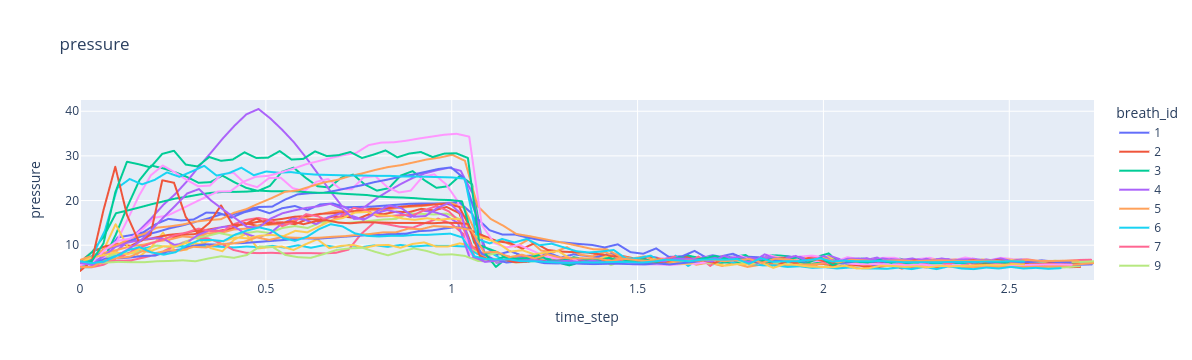

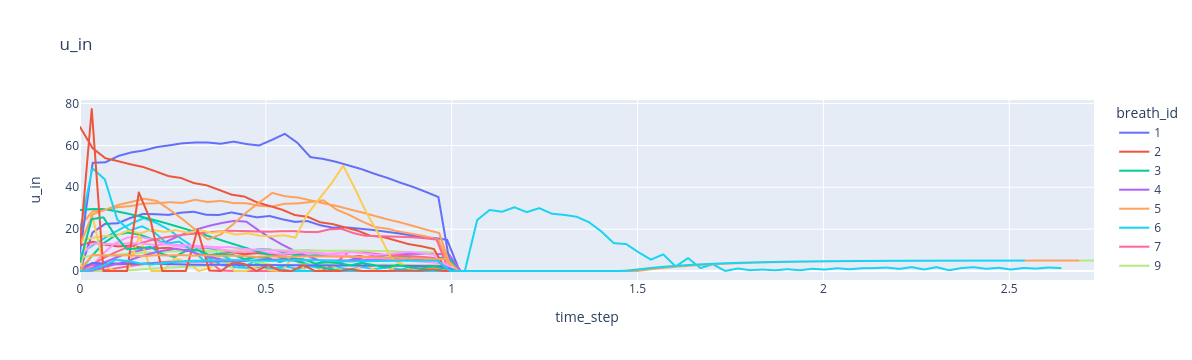

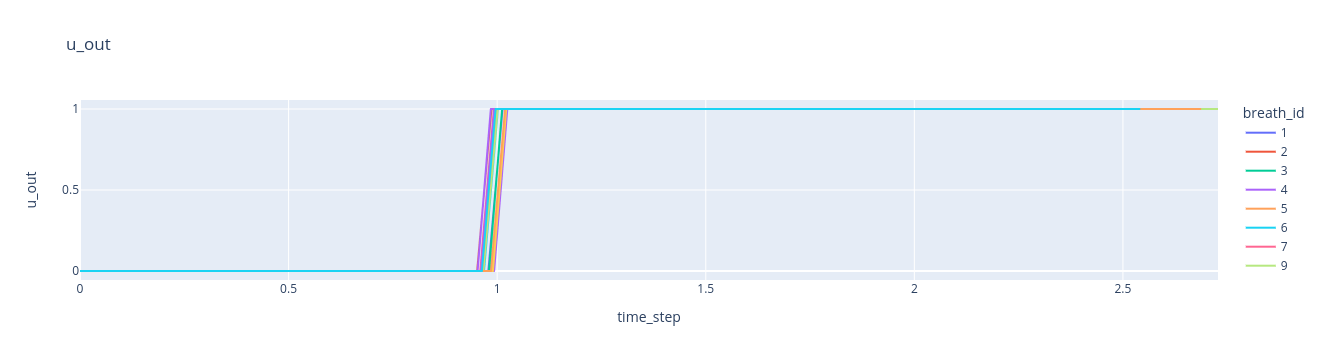

In [27]:
# How does a typical pressure curve look like?
import plotly.express as px
mask = df_train["breath_id"]<30
for y in ["pressure","u_in","u_out"]:
    fig = px.line(df_train.loc[mask,:], x="time_step", y=y, color="breath_id", title=y)
    fig.show()

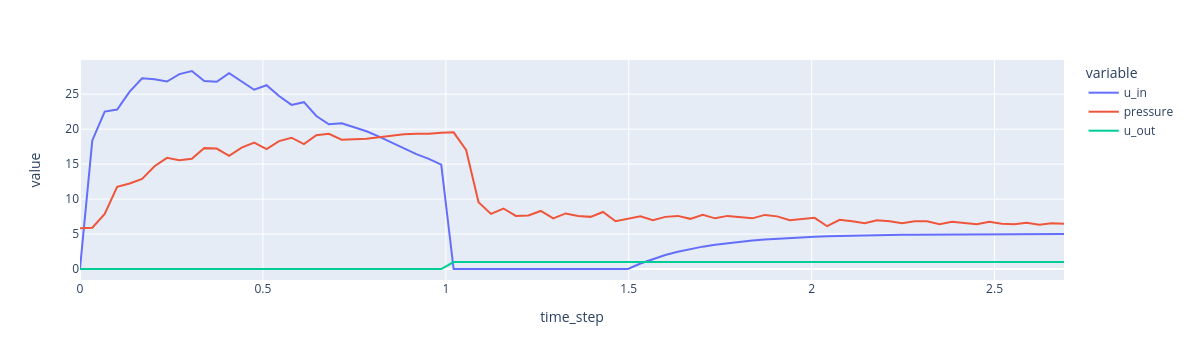

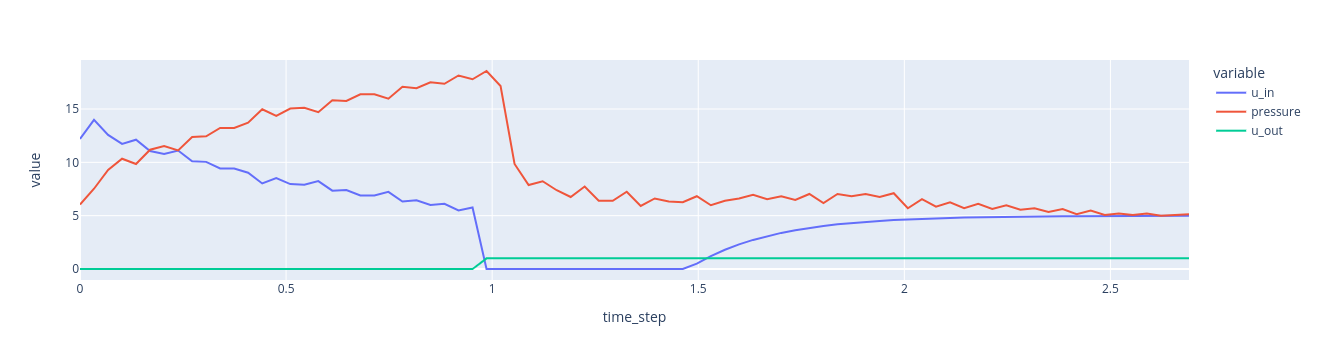

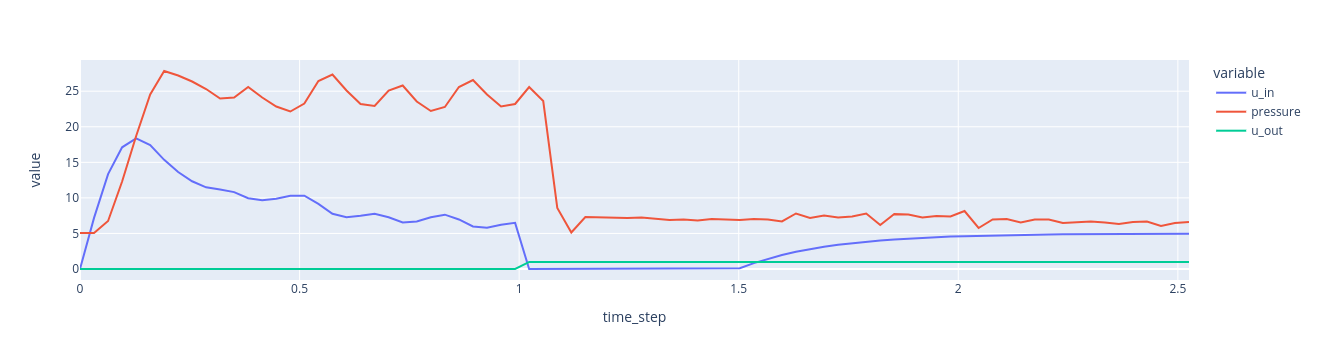

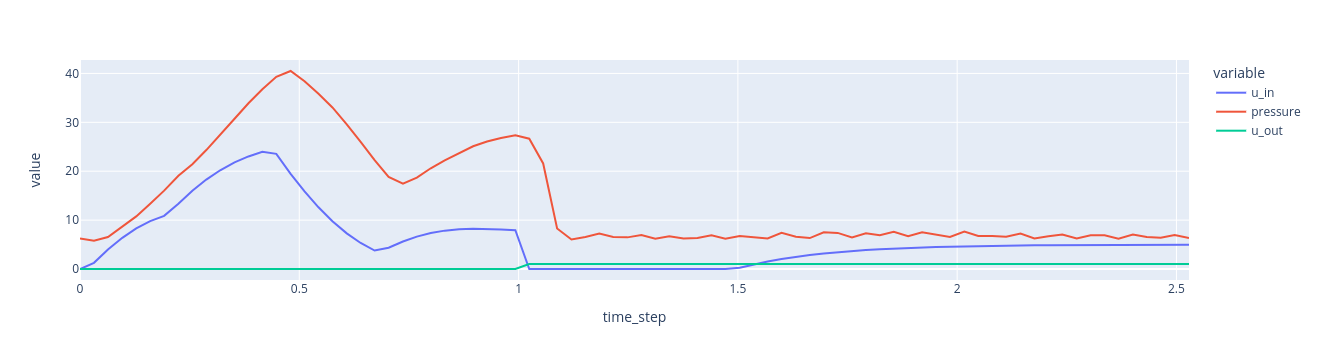

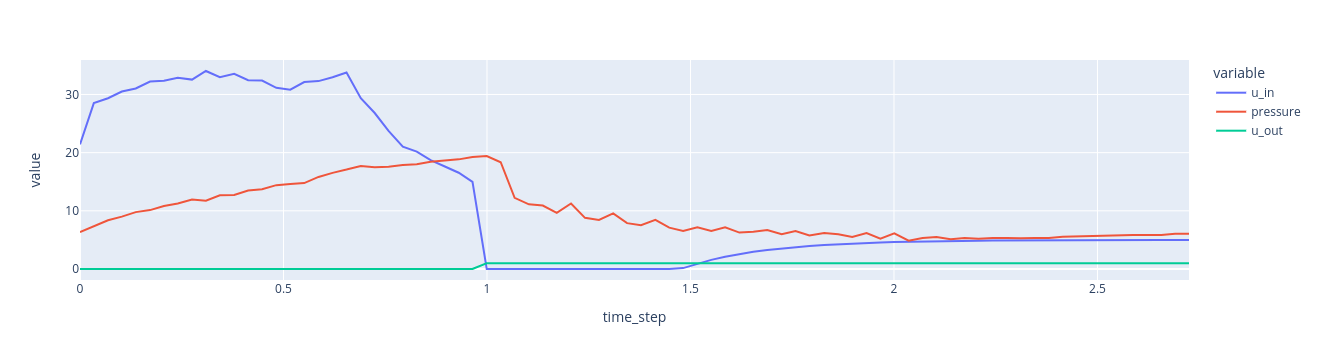

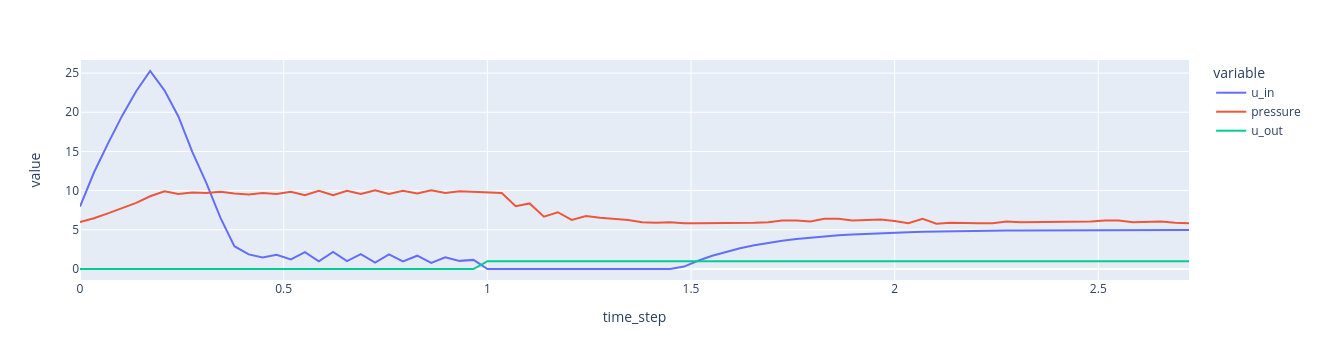

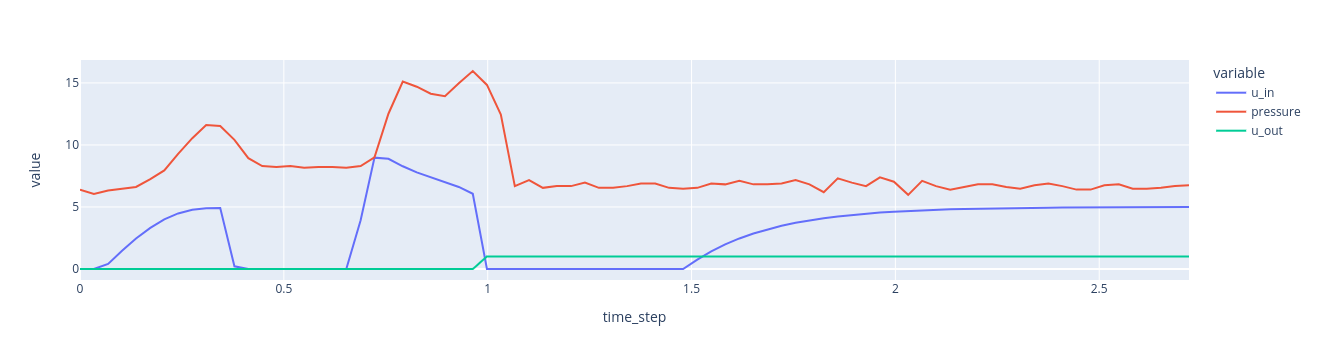

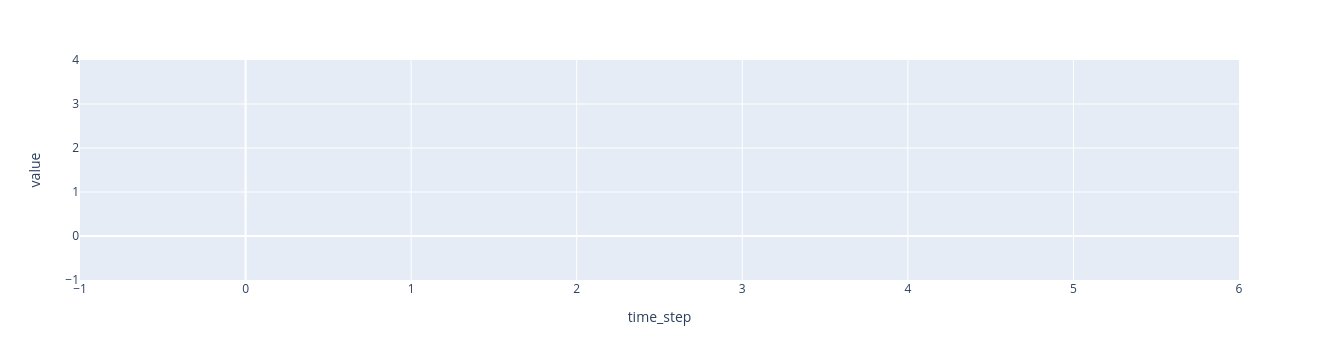

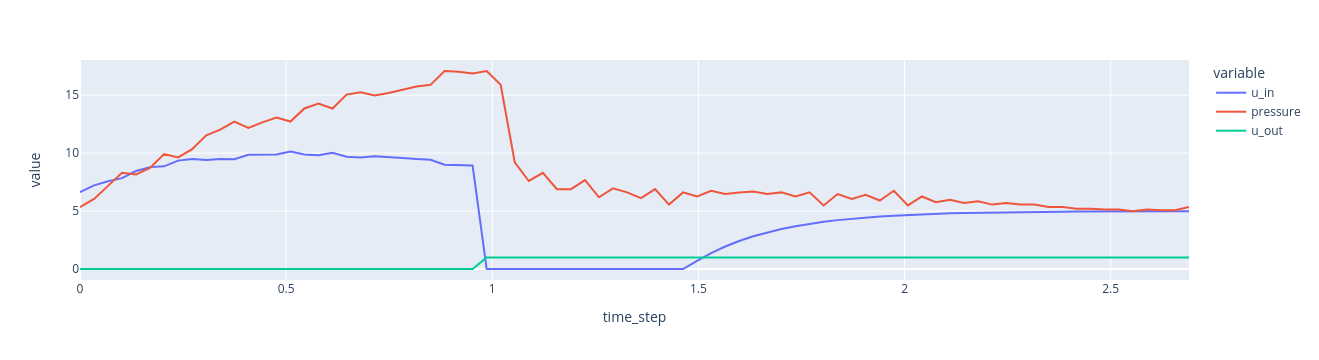

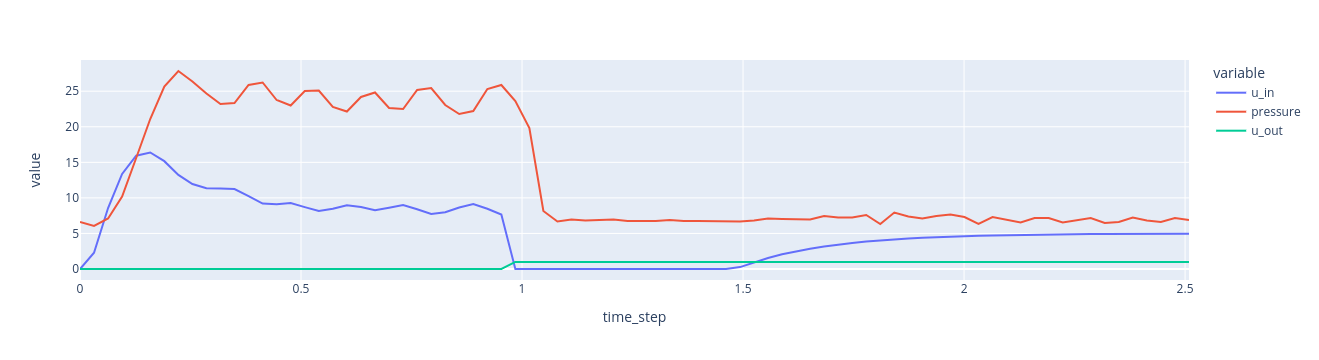

In [30]:
nexamples = 10
for i in range(1,nexamples+1):
    mask = df_train["breath_id"] == i
    fig = px.line(df_train.loc[mask, :], x="time_step", y=["u_in","pressure","u_out"])
    fig.show()

In [36]:
# What combinations from R,C exist?
x=df_train.loc[:,["R","C"]].values
np.unique(x, axis=0)

array([[ 5, 10],
       [ 5, 20],
       [ 5, 50],
       [20, 10],
       [20, 20],
       [20, 50],
       [50, 10],
       [50, 20],
       [50, 50]])

In [ ]:
# happy so far, go to bed :)

### Next steps

write a dataloader, which
- reads u_in, u_out, R, C, pressure

what shall be my target? pressure[t] or pressure[0:end] ?
- maybe try pressure[t] first. In that case, we can feed in the 
- No, first check how to predict a full time series (not just next step of time-series as in future shopping call)

Evaluation is scored as |X-Y| during inspiratory phase only